In [55]:
import numpy as np

labels = ['circle graph, n=10', 'circle graph, n=9', 'circle graph, n=9, extra edge between nodes 1 and 5', 'complete graph, n=10']


transition_matrix_1 = []
for i in range(10):
    row = [0.5 if j == i - 1 or j == i + 1 or abs(j - i) == 9 else 0 for j in range(10)]
    transition_matrix_1.append(row)

transition_matrix_2 = []
transition_matrix_3 = []
for i in range(9):
    row2 = [0.5 if j == i - 1 or j == i + 1 or abs(j - i) == 8 else 0 for j in range(9)]
    transition_matrix_2.append(row2)

    row3 = [0.5 if j == i - 1 or j == i + 1 or abs(j - i) == 8 else 0 for j in range(9)]
    if i == 0:
        row3[1] = 1/3
        row3[8] = 1/3
        row3[4] = 1/3
    if i == 4:
        row3[3] = 1/3
        row3[5] = 1/3
        row3[0] = 1/3
    transition_matrix_3.append(row3)

transition_matrix_4 = []
for i in range(10):
    row = [1/9 if j != i else 0 for j in range(10)]
    transition_matrix_4.append(row)

transition_matrices = [np.array(transition_matrix_1), np.array(transition_matrix_2), np.array(transition_matrix_3), np.array(transition_matrix_4)]

In [64]:
def total_variance_distance(d1, d2):
    res = 0
    assert len(d1) == len(d2)
    for i in range(len(d1)):
        res += 0.5 * abs(d1[i] - d2[i])
    return res

stationary_distributions = [[1/10] * 10, [1/9] * 9, [0.15, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1], [1/10] * 10]

current_distributions = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
]
tvds = [[] for i in range(len(labels))]

for t in range(101):
    for i in range(len(labels)):
        tvds[i].append(total_variance_distance(current_distributions[i], stationary_distributions[i]))
        current_distributions[i] = np.matmul(current_distributions[i], transition_matrices[i])

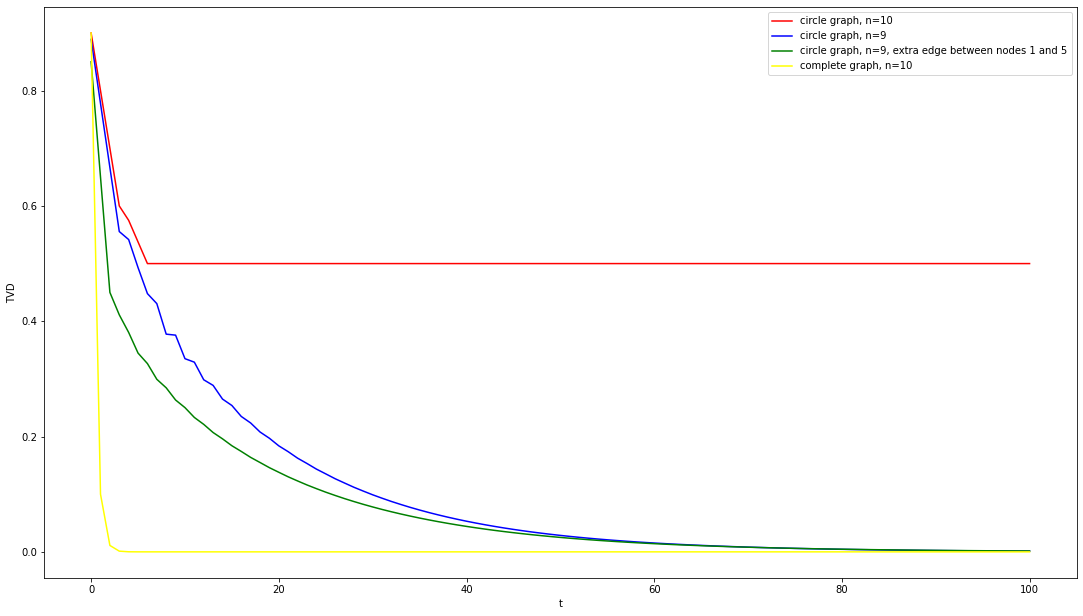

In [65]:
import matplotlib.pyplot as plt

xs = np.arange(0, 101)

fig, ax1 = plt.subplots()
fig.set_size_inches(18.5, 10.5)

colors = ['red', 'blue', 'green', 'yellow']
assert len(colors) == len(labels)

ax1.set_xlabel('t')
ax1.set_ylabel('TVD')

for i in range(len(labels)):
    ax1.plot(xs, tvds[i], color=colors[i], label=labels[i])

ax1.legend()

plt.show()
plt.close()

In [70]:
from numpy import linalg

for i, label in enumerate(labels):
    eig, _ = np.linalg.eig(transition_matrices[i])
    print(f'{label} - {sorted(eig)[-2]}')

circle graph, n=10 - 0.8090169943749479
circle graph, n=9 - 0.7660444431189781
circle graph, n=9, extra edge between nodes 1 and 5 - 0.7675918792439976
complete graph, n=10 - (-0.11111111111111106+0j)
